Adapted from Pixray: https://github.com/pixray/

In [1]:
#@title pixray_install
#@markdown Run this once, then "Restart and Run all"
%%capture
pixray_version = "latest release" #@param ["latest release", "next planned release"]
branch = "release"
if pixray_version == "next planned release":
  branch = "master"
!rm -Rf pixray
!git clone --recursive --branch $branch https://github.com/pixray/pixray
!pip install -r pixray/requirements.txt
!pip install basicsr
!pip uninstall -y tensorflow 
!git clone https://github.com/pixray/diffvg
%cd diffvg
!git submodule update --init --recursive
!python setup.py install
%cd ..
!pip freeze | grep torch

import sys
sys.path.append("pixray")
import pixray

In [ ]:
#@title OpenAI install{ vertical-output: true }
%%capture
!pip install openai
import openai
openai.api_key = "NULL"

In [ ]:
#@title Open-Ended Language Evolution{ vertical-output: true }
import json

def get_children(noun):
    prompt = "In a comma-separated list, give me ten one-word nouns related to '{}':"
    prompt = prompt.format(noun)
    # print(prompt)
    response = openai.Completion.create(
        engine="text-davinci-001",
        prompt=prompt,
        temperature=0,
        max_tokens=50,
    )["choices"][0].text
    if ',' in response:
        children = response.split(",")
    if '.' in response:
        children = response.split()
        children = [c for c in children if len(c) > 2]
    return [x.strip().strip(',').lower() for x in children]

max_depth = 2
def recurse_lang(noun, depth, history, tree):
    history.append(noun)
    print(''.join(["  "] * depth) + noun)
    new_tree = (noun, [])
    tree[1].append(new_tree)
    if depth < max_depth:
        children = get_children(noun)
        new_children = [i for i in children if i not in history]
        for c in new_children[:5]:
            recurse_lang(c, depth+1, history, new_tree)

history = []
tree = ('', [])
recurse_lang('apple', 0, history, tree)
print(json.dumps(tree))
    


apple
  fruit
    banana
    blueberry
    cherry
    date
    fig
  red
    scarlet
    burgundy
    crimson
    cardinal
    auburn
  green
    tree
    leaves
    grass
    shrub
    forest
  tart
    pastry
    pie
    dessert
    sweet
    food
  sweet
    cake
    candy
    chocolate
    ice cream
    sugar
["", [["apple", [["fruit", [["banana", []], ["blueberry", []], ["cherry", []], ["date", []], ["fig", []]]], ["red", [["scarlet", []], ["burgundy", []], ["crimson", []], ["cardinal", []], ["auburn", []]]], ["green", [["tree", []], ["leaves", []], ["grass", []], ["shrub", []], ["forest", []]]], ["tart", [["pastry", []], ["pie", []], ["dessert", []], ["sweet", []], ["food", []]]], ["sweet", [["cake", []], ["candy", []], ["chocolate", []], ["ice cream", []], ["sugar", []]]]]]]]


  0%|                                               | 0.00/244M [00:00<?, ?iB/s]

Using seed: 4551945702162696730
Running fast pixeldrawer with 16x16 grid


100%|███████████████████████████████████████| 244M/244M [00:03<00:00, 65.7MiB/s]
  0%|                                               | 0.00/338M [00:00<?, ?iB/s]

Loaded CLIP RN50: 224x224 and 102.01M params


100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 63.5MiB/s]
  0%|                                      | 1.05M/335M [00:00<00:31, 10.9MiB/s]

Loaded CLIP ViT-B/32: 224x224 and 151.28M params


100%|███████████████████████████████████████| 335M/335M [00:05<00:00, 62.2MiB/s]


Loaded CLIP ViT-B/16: 224x224 and 149.62M params
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['an icon of a apple #pixelart']


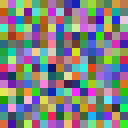

iter: 0, loss: 2.99, losses: 0.983, 0.0835, 0.894, 0.0651, 0.892, 0.0684 (-0=>2.987)
iter: 10, loss: 2.75, losses: 0.908, 0.0868, 0.811, 0.066, 0.815, 0.0659 (-0=>2.752)


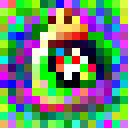

iter: 20, loss: 2.67, losses: 0.891, 0.0886, 0.778, 0.0678, 0.777, 0.0666 (-1=>2.663)
iter: 30, loss: 2.61, losses: 0.887, 0.088, 0.739, 0.0696, 0.757, 0.0679 (-1=>2.565)


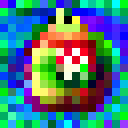

iter: 40, loss: 2.51, losses: 0.862, 0.0868, 0.708, 0.0701, 0.713, 0.0684 (-1=>2.473)
iter: 50, loss: 2.49, losses: 0.839, 0.0897, 0.703, 0.0717, 0.716, 0.0685 (-1=>2.441)


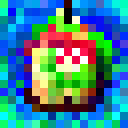

iter: 60, loss: 2.43, losses: 0.828, 0.0891, 0.685, 0.0729, 0.69, 0.0694 (-0=>2.434)
iter: 70, loss: 2.42, losses: 0.811, 0.0887, 0.687, 0.0733, 0.695, 0.069 (-2=>2.414)
Dropping learning rate


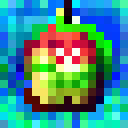

iter: 80, loss: 2.4, losses: 0.805, 0.0907, 0.669, 0.0734, 0.688, 0.0694 (-0=>2.396)
iter: 90, loss: 2.36, losses: 0.788, 0.0905, 0.663, 0.0748, 0.678, 0.0691 (-4=>2.346)


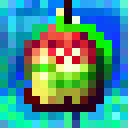

iter: 100, finished (-5=>2.344)



In [ ]:
#@title Generate pixel art{ vertical-output: true }
#pixel
import shutil
import os

if not os.path.isdir('imgs'):
    os.mkdir('imgs')

def make_image(noun, start_img=None):
    pixray.run(
        "an icon of a {} #pixelart".format(noun),
        "fast_pixel",
        quality="better",
        size=[128,128],
        pixel_size= [16, 16],
        scale=1,
        iterations=100,
        outdir='outputs/{}'.format(noun)
    )
    shutil.copyfile('outputs/{}/output.png'.format(noun), 'imgs/{}.png'.format(noun))

make_image('apple')
# for noun in history:
#     make_image(noun)


In [ ]:
pixray.best_loss

tensor(2.3442, device='cuda:0')

In [ ]:
!zip -r imgs.zip imgs

  adding: imgs/ (stored 0%)
  adding: imgs/pastry.png (deflated 15%)
  adding: imgs/fruit.png (deflated 15%)
  adding: imgs/food.png (deflated 14%)
  adding: imgs/tart.png (deflated 14%)
  adding: imgs/tree.png (deflated 15%)
  adding: imgs/banana.png (deflated 15%)
  adding: imgs/auburn.png (deflated 15%)
  adding: imgs/sweet.png (deflated 15%)
  adding: imgs/sugar.png (deflated 15%)
  adding: imgs/leaves.png (deflated 14%)
  adding: imgs/dessert.png (deflated 15%)
  adding: imgs/apple.png (deflated 14%)
  adding: imgs/chocolate.png (deflated 15%)
  adding: imgs/crimson.png (deflated 14%)
  adding: imgs/pie.png (deflated 14%)
  adding: imgs/fig.png (deflated 14%)
  adding: imgs/cherry.png (deflated 14%)
  adding: imgs/red.png (deflated 14%)
  adding: imgs/burgundy.png (deflated 15%)
  adding: imgs/blueberry.png (deflated 14%)
  adding: imgs/date.png (deflated 15%)
  adding: imgs/grass.png (deflated 14%)
  adding: imgs/cardinal.png (deflated 15%)
  adding: imgs/ice cream.png (deflated 